# OLD PHOTOS CLASSIFIER

## Importing Libraries

In [7]:
import pandas as pd
import cv2
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Creating the train and test dataset

### Function for image data preproccessing

In [8]:
def importing_image_data(path, label):
    x = []
    y = []
    for img_name in os.listdir(path):
        if 'spate' in img_name:
            continue
        img = cv2.imread(path + '\\' + img_name)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        img = img / 255
        x.append(img)
        y.append(label)
    
    return np.array(x), np.array(y)

### Preproccessing the black and white and color images seperately

In [9]:
x_black_and_white, y_black_and_white = importing_image_data("D:\\Imagini\\Alb_Negru", 0)
x_color, y_color = importing_image_data("D:\\Imagini\\Color", 1)

x_black_and_white.shape, y_black_and_white.shape, x_color.shape, y_color.shape

((261, 224, 224, 3), (261,), (121, 224, 224, 3), (121,))

### Equaling the number of black and white images to the number of color images

In [10]:
x_black_and_white, y_black_and_white = x_black_and_white[:121], y_black_and_white[:121]

x_black_and_white.shape, y_black_and_white.shape, x_color.shape, y_color.shape

((121, 224, 224, 3), (121,), (121, 224, 224, 3), (121,))

### Creating a test and train set for black and white and color images seperately

In [11]:
x_black_and_white_train, x_black_and_white_test, y_black_and_white_train, y_black_and_white_test = train_test_split(x_black_and_white, y_black_and_white, test_size = 0.2, random_state = 42)
x_color_train, x_color_test, y_color_train, y_color_test = train_test_split(x_color, y_color, test_size=0.2, random_state=42)

print(x_black_and_white_train.shape, x_black_and_white_test.shape, y_black_and_white_train.shape, y_black_and_white_test.shape)
print(x_color_train.shape, x_color_test.shape, y_color_train.shape, y_color_test.shape)

(96, 224, 224, 3) (25, 224, 224, 3) (96,) (25,)
(96, 224, 224, 3) (25, 224, 224, 3) (96,) (25,)


### Combining the test and train sets

In [12]:
x_train = np.vstack((x_black_and_white_train, x_color_train))
x_test = np.vstack((x_black_and_white_test, x_color_test))
y_train = np.hstack((y_black_and_white_train, y_color_train))
y_test = np.hstack((y_black_and_white_test, y_color_test))

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((192, 224, 224, 3), (50, 224, 224, 3), (192,), (50,))

## Model Configuration

### Building the model

In [17]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape = (224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics='accuracy')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 flatten_1 (Flatten)         (None, 760384)            0         
                                                                 
 dense_5 (Dense)             (None, 256)               194658560 
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                      

### Initializing earlystopping callback

In [18]:
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True)

### Training the model

In [19]:
model.fit(x_train, y_train, epochs = 10, batch_size=10, validation_data=(x_test, y_test), callbacks=earlystopping)

Epoch 1/10
20/20 [==============================] - 377s 17s/step - loss: 1.5527 - accuracy: 0.6250 - val_loss: 0.4043 - val_accuracy: 0.8200
Epoch 2/10
20/20 [==============================] - 525s 25s/step - loss: 0.4181 - accuracy: 0.8177 - val_loss: 0.3571 - val_accuracy: 0.8000
Epoch 3/10
20/20 [==============================] - 343s 15s/step - loss: 0.3336 - accuracy: 0.8854 - val_loss: 0.6064 - val_accuracy: 0.7800
Epoch 4/10
20/20 [==============================] - 241s 12s/step - loss: 0.3961 - accuracy: 0.8698 - val_loss: 0.2713 - val_accuracy: 0.9000
Epoch 5/10
20/20 [==============================] - 274s 12s/step - loss: 0.1857 - accuracy: 0.9271 - val_loss: 0.4123 - val_accuracy: 0.8200
Epoch 6/10
20/20 [==============================] - 191s 10s/step - loss: 0.1224 - accuracy: 0.9531 - val_loss: 0.2696 - val_accuracy: 0.8600
Epoch 7/10
20/20 [==============================] - 243s 11s/step - loss: 0.0479 - accuracy: 0.9896 - val_loss: 0.3903 - val_accuracy: 0.8800
Epoch 

### Evaluating the model

2/2 [==============================] - 6s 821ms/step


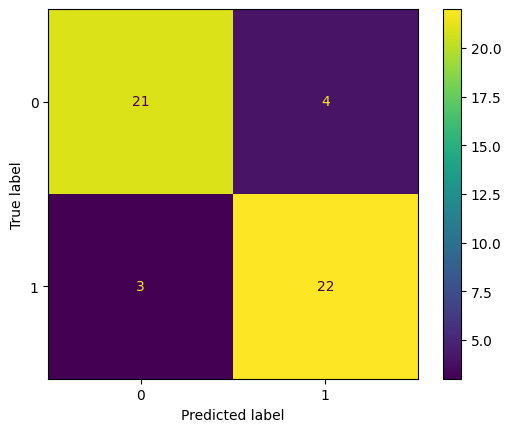

In [20]:
predicted = model.predict(x_test)
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

### Hyperparameter tuning

### Saving the model (the saved model was later moved on the external SSD where the dataset is located, due to it being too big in size to upload on GitHub)

In [11]:
model.save('old_photos_model.h5')

c:\Users\Misu\anaconda3\envs\block_c\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
